# Exploratory data analysis of US Housing dataset
---

### Detailed description of each feature:

- Date: The date when the property was sold.
- Price:The sale price of the property in USD.
- Bedrooms:The number of bedrooms in the property.
- Bathrooms: The number of bathrooms in the property.
- Sqft Living: The size of the living area in square feet.
- Sqft Lot:The size of the lot in square feet.
- Floors: The number of floors in the property.
- Waterfront: A binary indicator(1 if the property has a waterfront view, 0 other-wise).
- View: An index from 0 to 4 indicating the quality of the property’s view.
- Condition: An index from 1 to 5 rating the condition of the property.
- Sqft Above: The square footage of the property above the basement.
- Sqft Basement: The square footage of the basement.
- Yr Built: The year the property was built.
- Yr Renovated: The year the property was last renovated.
- Street: The street address of the property.
- City: The city where the property is located.
- Statezip: The state and zip code of the property.
- Country: The country where the property is located.

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("USA Housing Dataset.csv")

In [3]:
# Displaying the first few rows of the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
# Checking the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Displaying the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Checking for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
df.describe().T

The dataset contains 4140 rows and 18 columns.

Data types of each column:
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Missing values in the dataset:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Summary of the dataset:


,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


In [5]:
# Data cleaning
df["date"] = pd.to_datetime(df["date"])

# Dropping unnecessary columns
columns_to_drop = ['street', 'statezip', 'country']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to confirm changes
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014-05-09,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle
1,2014-05-09,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,Carnation


In [6]:
# Identifying categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['city']
Numerical Variables: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


### **Insights to be obtained from dataset:**


1.   Does the location affect the price of houses?
2.   How does the size of a property (living area and lot) correlate with its price?

1.   How do the number of bedrooms and bathrooms affect property prices?
2.   Does the number of floors in a property affect its price?

1.   How does the condition of a property impact its price?
2.   How do the year a property was built and whether it was renovated affect its price?

1.   How does the amount of above-ground space affect prices?
2.   Is the quality of the property’s view likely to enhance a property’s value?

1.   Do properties with waterfront views  command higher prices?
2.   Generally how does the overall features affect price?


---

Q1. Does the location affect the price of houses?

In [7]:
# Sort the dataframe by price. Return the top 3 prices from the dataframe.
df_sorted = df.sort_values(by='price', ascending=False)
df_sorted[:3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
3890,2014-07-03,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,Kent
3886,2014-06-23,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,1550,640,1956,2001,Seattle
1826,2014-06-11,7062500.0,5.0,4.5,10040,37325,2.0,1,2,3,7680,2360,1940,2001,Bellevue


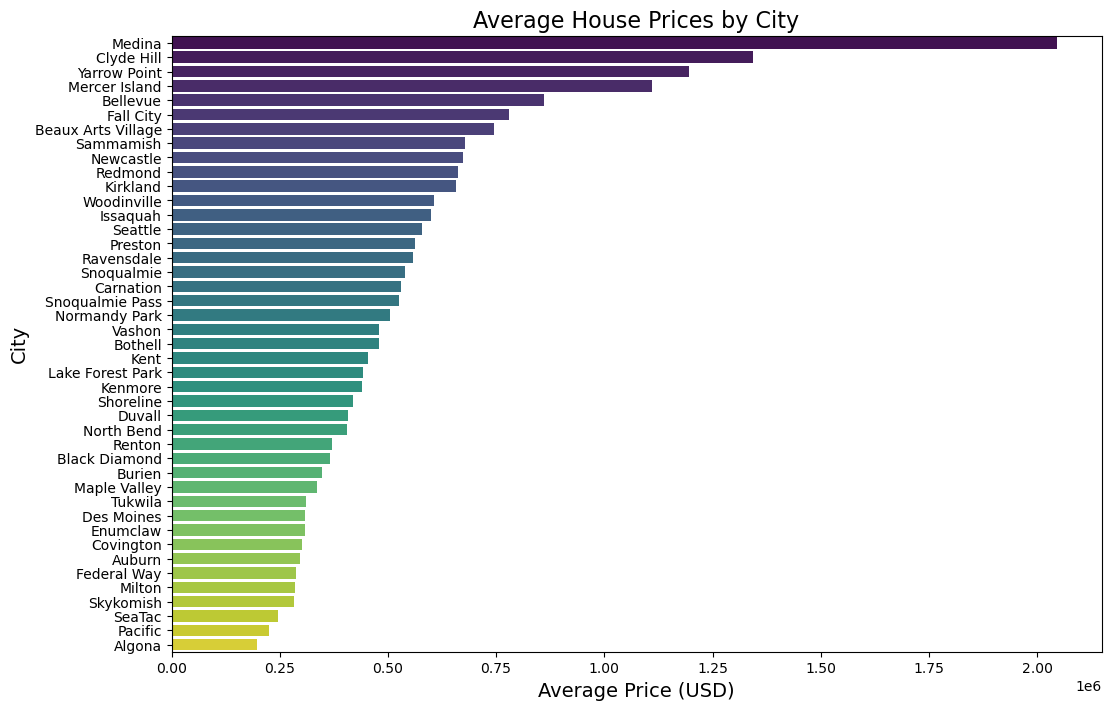

In [8]:
# average price of properties in different cities.
average_price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False)

# Convert the Series to a DataFrame for easier plotting
average_price_by_city_df = average_price_by_city.reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='city', data=average_price_by_city_df, hue='city', palette='viridis', legend=False)

# Adding titles and labels
plt.title('Average House Prices by City', fontsize=16)
plt.xlabel('Average Price (USD)', fontsize=14)
plt.ylabel('City', fontsize=14)

# Display the plot
plt.show()

**A1. Yes, the location affect the price of houses. The bar plot gives a clear visualization of how property prices vary across different cities showing the impact of location on house prices.**

Q2. How does the size of a property (living area and lot) correlate with its price?

Correlation between sqft_living and price: 0.42
Correlation between sqft_lot and price: 0.05


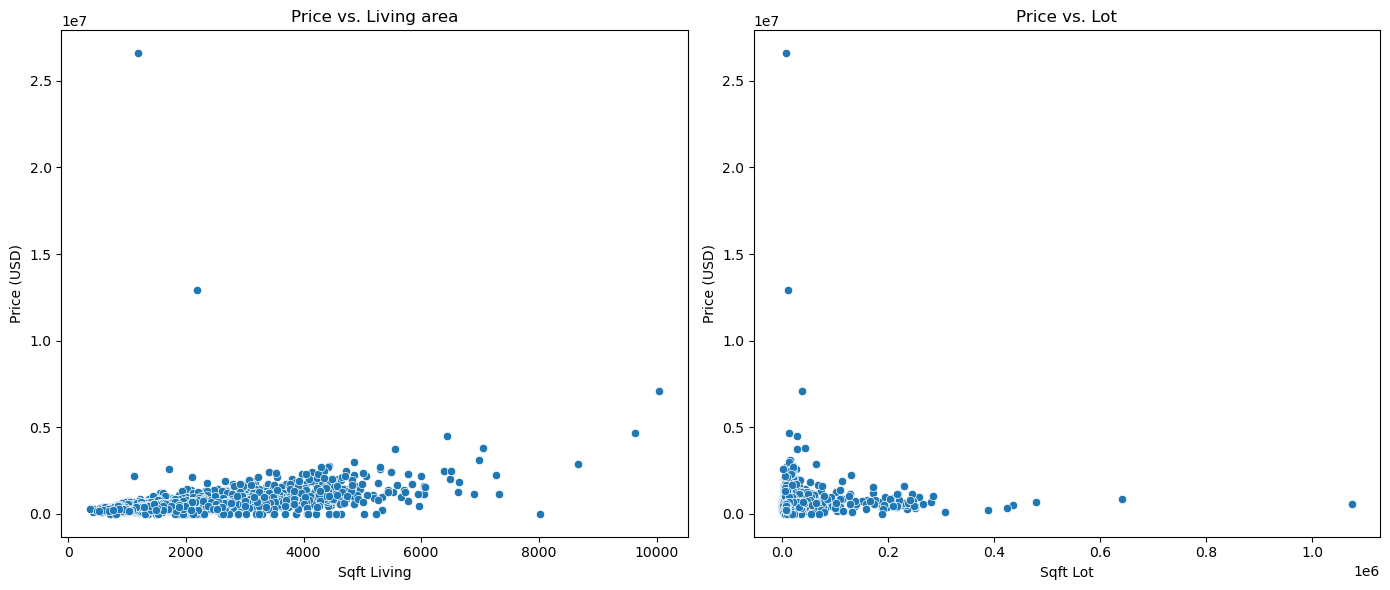

In [9]:
# Calculate correlation coefficients
correlation_sqft_living = df['sqft_living'].corr(df['price'])
correlation_sqft_lot = df['sqft_lot'].corr(df['price'])

print(f"Correlation between sqft_living and price: {correlation_sqft_living:.2f}")
print(f"Correlation between sqft_lot and price: {correlation_sqft_lot:.2f}")

# Plotting the relationship between sqft_living and price
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Living area')
plt.xlabel('Sqft Living')
plt.ylabel('Price (USD)')

# Plotting the relationship between sqft_lot and price
plt.subplot(1, 2, 2)
sns.scatterplot(x='sqft_lot', y='price', data=df)
plt.title('Price vs. Lot')
plt.xlabel('Sqft Lot')
plt.ylabel('Price (USD)')

plt.tight_layout()
plt.show()

**A2. There is a moderate positive correlation between the living area and the property price. As the living area increases, the price tends to increase as well. However there is a very weak positive correlation between the lot size and the property price. The lot size has little to no linear relationship with the price. Overall the prize of the property tends to  increase with size.**

3. How do the number of bedrooms and bathrooms affect property prices?

In [10]:
df['bathrooms'].nunique()

24

Correlation between bedrooms and price: 0.19
Correlation between bathrooms and price: 0.32


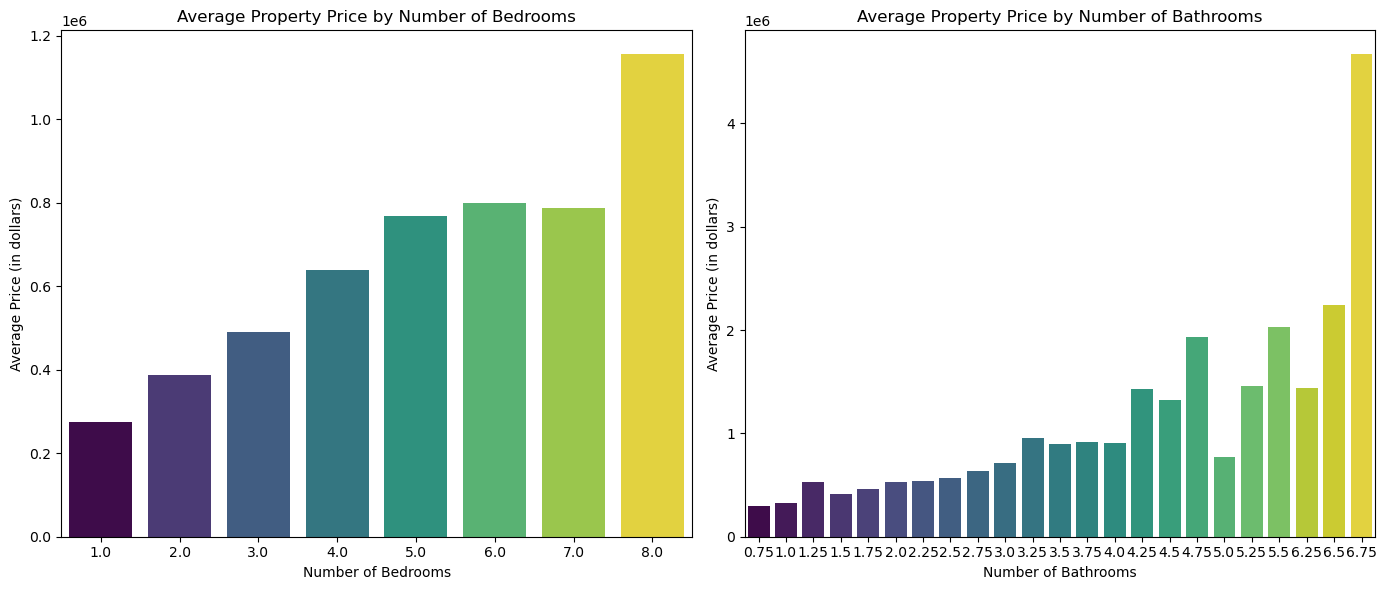

In [11]:
# Calculate correlation coefficients
correlation_bedrooms = df['bedrooms'].corr(df['price'])
correlation_bathrooms = df['bathrooms'].corr(df['price'])
print(f"Correlation between bedrooms and price: {correlation_bedrooms:.2f}")
print(f"Correlation between bathrooms and price: {correlation_bathrooms:.2f}")

# Filter out rows where the number of bedrooms or bathrooms is zero
filtered_df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]

# Calculate the average property price for each number of bedrooms
average_price_bedrooms = filtered_df.groupby('bedrooms')['price'].mean().reset_index()

# Calculate the average property price for each number of bathrooms
average_price_bathrooms = filtered_df.groupby('bathrooms')['price'].mean().reset_index()

# Bar plots to visualize the relationship
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='bedrooms', y='price', data=average_price_bedrooms,hue='bedrooms',legend=False, palette='viridis')
plt.title('Average Property Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (in dollars)')


plt.subplot(1, 2, 2)
sns.barplot(x='bathrooms', y='price', data=average_price_bathrooms,hue='bathrooms',legend=False, palette='viridis')
plt.title('Average Property Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price (in dollars)')

plt.tight_layout()
plt.show()

**A3. The correlation coefficient of 0.19 indicates a weak positive relationship between the number of bedrooms and property prices suggesting that while an increase in the number of bedrooms might be associated with an increase in property prices, the relationship is not very strong. Other factors likely have a more significant impact on property prices than the number of bedrooms.**
**The correlation coefficient of 0.32 indicates a moderate positive relationship between the number of bathrooms and property prices suggesting that properties with more bathrooms tend to be more expensive, and the number of bathrooms has a somewhat stronger influence on property prices compared to the number of bedrooms. This could be because more bathrooms often correlate with larger, more luxurious homes, which command higher prices**


4 Does the number of floors in a property affect its price?



In [12]:
df['floors'].unique()

array([3. , 2. , 1. , 2.5, 1.5, 3.5])

Correlation between number of floors and price: 0.14


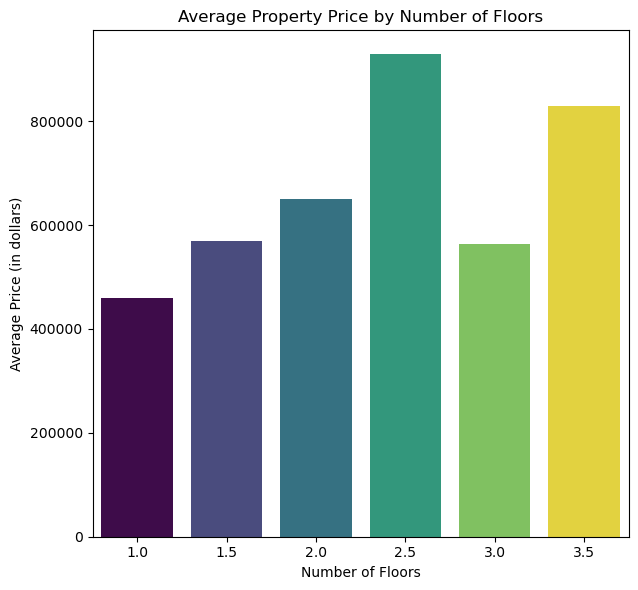

In [13]:
# Calculate correlation coefficient
correlation_floors = df['floors'].corr(df['price'])
print(f"Correlation between number of floors and price: {correlation_floors:.2f}")

#Calculate the average property price for each number of floors
average_price_floors = df.groupby('floors')['price'].mean().reset_index()

# Bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='floors', y='price', data=average_price_floors,hue='floors',legend=False, palette='viridis')
plt.title('Average Property Price by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price (in dollars)')

plt.tight_layout()
plt.show()

**A4. According to the correlation coefficient and visualization, properties with more floors may have slightly higher prices, but the effect is not very strong.This weak correlation indicates that the number of floors is not a major factor in determining property prices as other factors likely have a more substantial impact on property prices.**

5. How does the condition of a property impact its price?

In [14]:
#Calculate average prices by condition
average_price_by_condition = df.groupby('condition')['price'].mean()
print("Average prices by condition:")
print(average_price_by_condition)


Average prices by condition:
condition
1    316960.000000
2    327035.555556
3    551103.991769
4    538239.544132
5    625629.992920
Name: price, dtype: float64


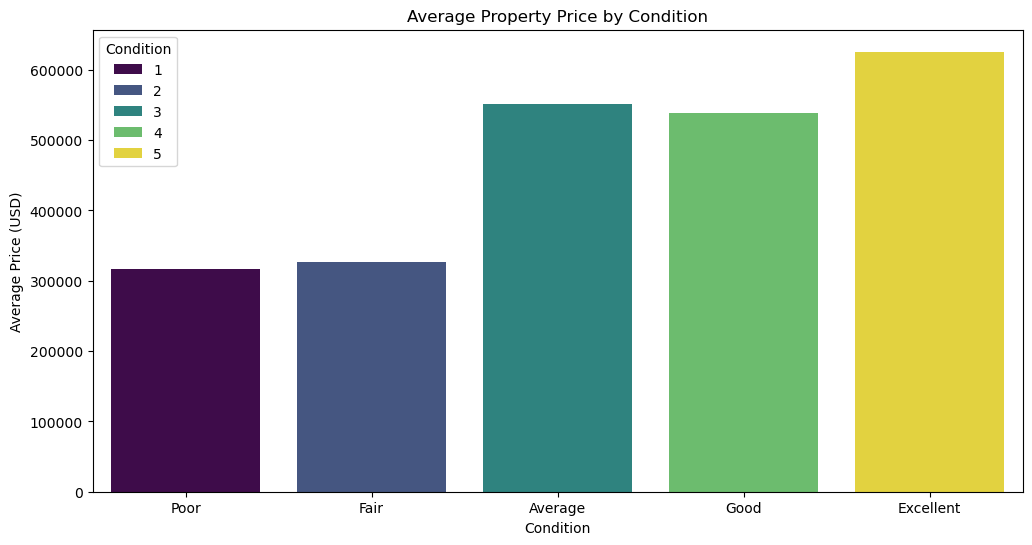

In [15]:
# Calculate average price for properties based on their condition
condition_price_comparison = df.groupby('condition')['price'].mean().reset_index()

# Rename columns for clarity
condition_price_comparison.columns = ['Condition', 'Average Price']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Condition', y='Average Price', data=condition_price_comparison,hue='Condition',  palette='viridis',legend=True)
plt.title('Average Property Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=[ 0, 1, 2, 3, 4], labels=['Poor', 'Fair', 'Average', 'Good', 'Excellent'])
plt.show()

**A5. Properties in excellent condition command higher prices compared to the properties in poor condition.**

6. How do the year a property was built and whether it was renovated affect its price?

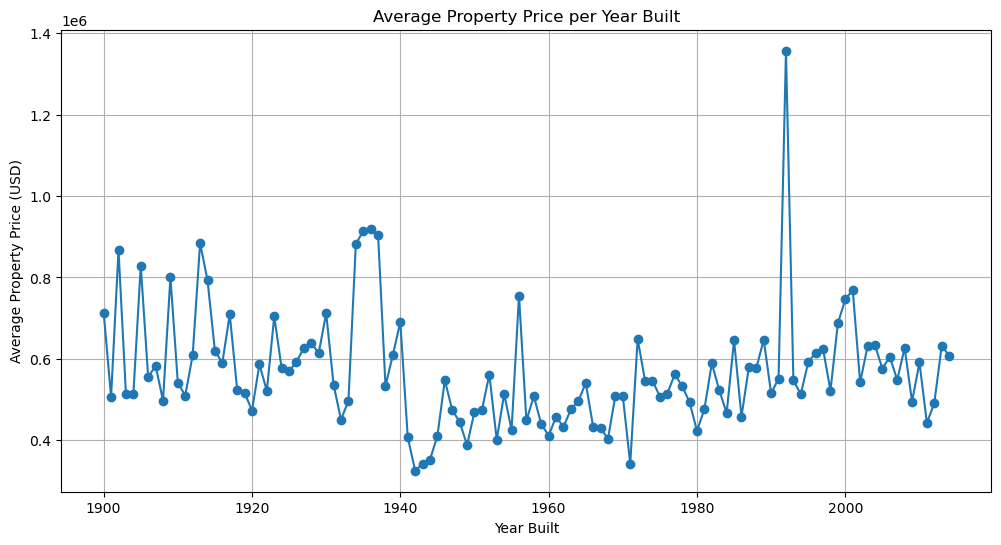

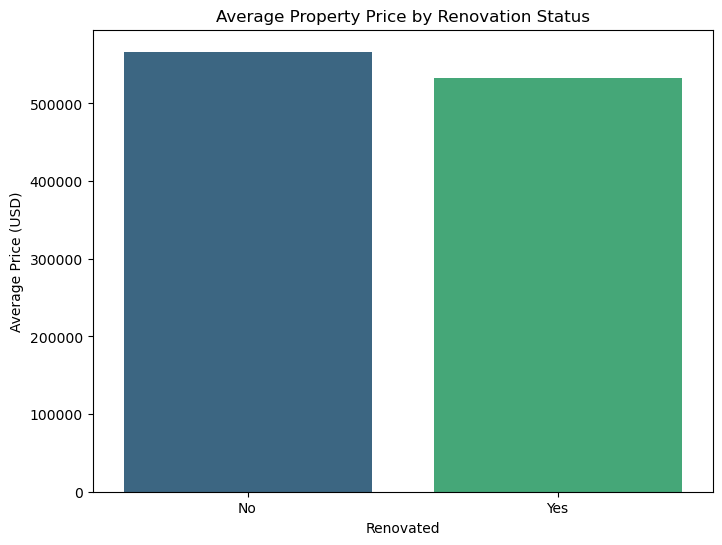

In [16]:
# Calculate the average property price per year built
average_price_per_year = df.groupby('yr_built')['price'].mean()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o')
plt.xlabel('Year Built')
plt.ylabel('Average Property Price (USD)')
plt.title('Average Property Price per Year Built')
plt.grid(True)
plt.show()

# Create a column to indicate whether the property was renovated
df['renovated'] = df['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No')
# Calculate average price for properties based on renovation status
renovation_price_comparison = df.groupby('renovated')['price'].mean().reset_index()
# Rename columns for clarity
renovation_price_comparison.columns = ['Renovated', 'Average Price']
# Plotting the relationship between renovation status and average price
plt.figure(figsize=(8, 6))
sns.barplot(x='Renovated', y='Average Price', data=renovation_price_comparison, hue='Renovated', legend=False,palette='viridis')
plt.title('Average Property Price by Renovation Status')
plt.xlabel('Renovated')
plt.ylabel('Average Price (USD)')
plt.show()

**A6. The analysis of property prices based on the year of construction reveals a fluctuating trend. Both the older and newer properties exhibit variability in prices; some have lower prices due to age and potential renovation needs, while others command higher prices due to unique design or architectural style. In general, newer properties with higher average prices reflects modern construction standards and amenities. Interestingly, the average price of renovated properties is lower than that of non-renovated properties, suggesting that other influencing factors, may play a significant role in determining property values.**

Q7. How does the amount of above-ground space affect prices?

Correlation between above-ground space and price: 0.36


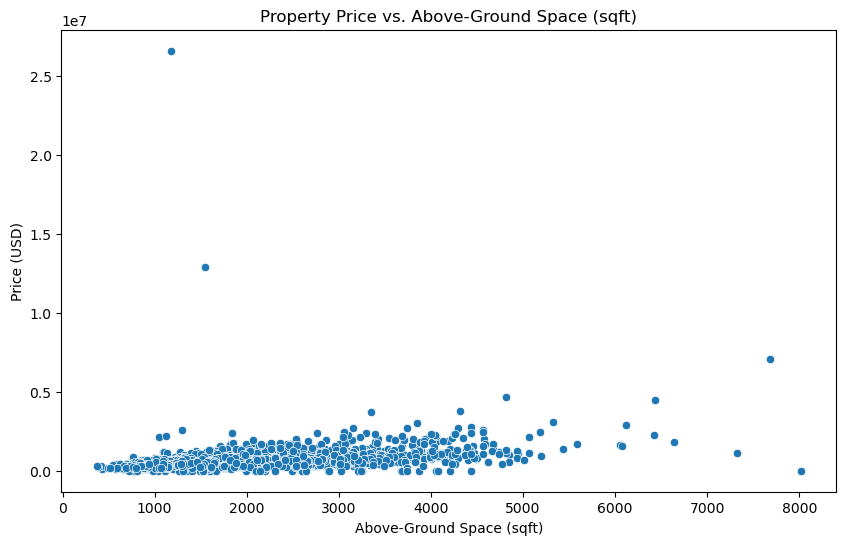

In [17]:
correlation = df['sqft_above'].corr(df['price'])
print(f'Correlation between above-ground space and price: {correlation:.2f}')

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_above', y='price', data=df)
plt.title('Property Price vs. Above-Ground Space (sqft)')
plt.xlabel('Above-Ground Space (sqft)')
plt.ylabel('Price (USD)')
plt.show()

**A7. There is a positive correlation, meaning that as the above-ground living space increases, property prices tend to increase.**

Q8. Is the quality of the property’s view likely to enhance a property’s value?

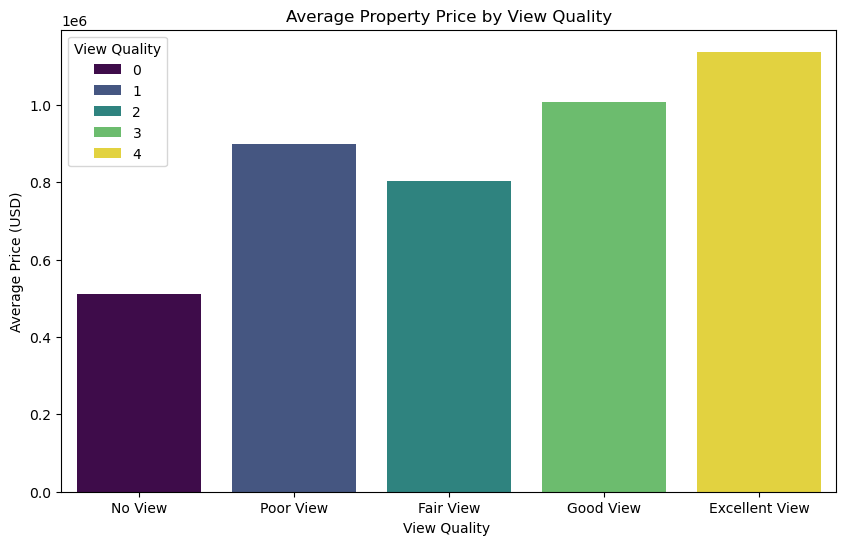

In [18]:
# Calculate average price for properties based on the quality of the view
view_quality_price_comparison = df.groupby('view')['price'].mean().reset_index()

# Rename columns for clarity
view_quality_price_comparison.columns = ['View Quality', 'Average Price']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='View Quality', y='Average Price', data=view_quality_price_comparison,hue="View Quality", palette='viridis',legend=True)
plt.title('Average Property Price by View Quality')
plt.xlabel('View Quality ')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['No View', 'Poor View', 'Fair View', 'Good View', 'Excellent View'])
plt.show()

**A8. Yes, the bars for higher view quality ratings (3 and 4) are significantly higher than those for lower ratings (0, 1, 2), confirming that quality of the property’s view generally enhance a property’s value.**

Q9. Do properties with waterfront views command higher prices?

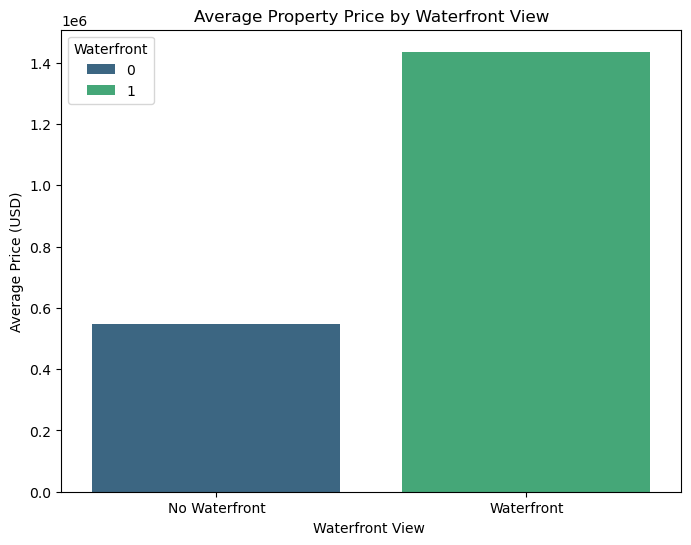

In [19]:
# Calculate average price for properties with and without waterfront views
waterfront_price_comparison = df.groupby('waterfront')['price'].mean().reset_index()

# Rename columns for clarity
waterfront_price_comparison.columns = ['Waterfront', 'Average Price']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Waterfront', y='Average Price', data=waterfront_price_comparison,hue='Waterfront', palette='viridis',legend=True)
plt.title('Average Property Price by Waterfront View')
plt.xlabel('Waterfront View ')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=[0, 1], labels=['No Waterfront', 'Waterfront'], rotation=0)
plt.show()

**A9. Yes, properties with waterfront views have a higher average price compared with those without waterfront views.**

Q10.Generally how does the overall features affect price?

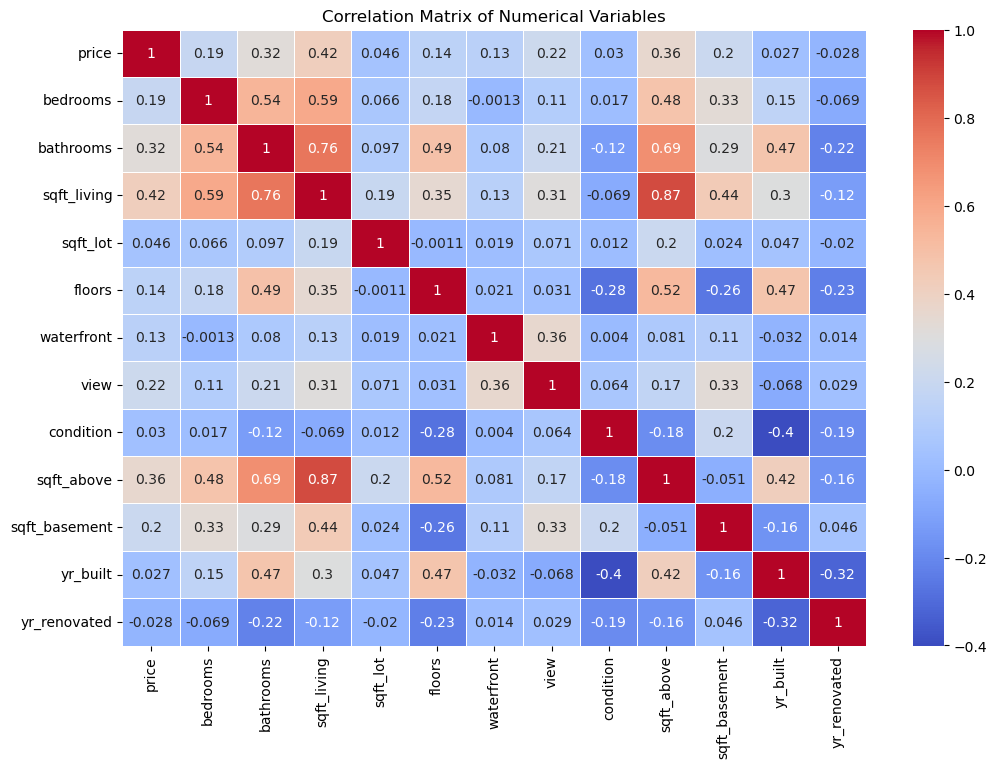

In [20]:
# Compute  and plot correlation matrix of numerical variables
plt.figure(figsize=(12, 8))
numerical_df = df[numerical_vars]  # Select only the numerical variables
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



**A10. There is a moderate positive correlation between sqft_living (size of living area in square feet),sqft_above (square footage of the property above the basement) and bathroom (number of bathrooms) with values of 0.42, 0.36 and 0.32 respectively indicating that the increase in the size of the property increases its price . The correlation between price and other variables is relatively low.**

## CONCLUSION
Overall,there is no extremely strong correlations between the price and other features. This analysis of how the house features and location affects property prices can help in making informed investment decisions, identifying high-growth areas, and evaluating market trends.